In [21]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
X, y = make_classification(n_samples= 1000, n_classes = 2, random_state=1 )

trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.5, random_state=2)


#generating a no skill prediction (for majority class)
ns_probs = [0 for _ in range(len(testy))]


#fit
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

lr_probs = model.predict_proba(testX)

#keeping prob for positive outcome only 
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('logistic: ROC AUC =%.3f' % (lr_auc))


No Skill: ROC AUC=0.500
logistic: ROC AUC =0.903


In [16]:
#calculating ROC curves 
ns_fpr, ns_tpr , _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)


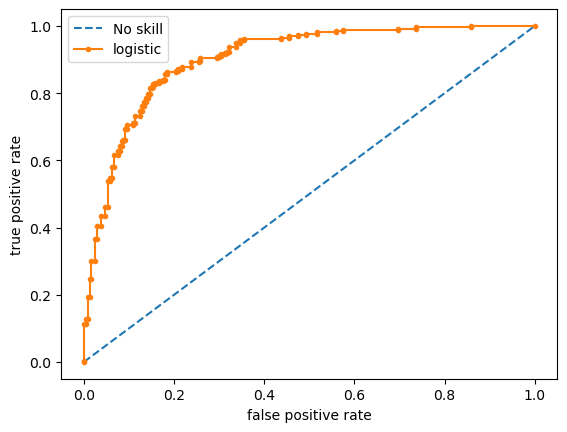

In [20]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label= "No skill")
plt.plot(lr_fpr, lr_tpr, marker=".", label="logistic")

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.legend()

plt.show()